# Numerical Integration Methods

Numerical integration methods approximate the value of a definite integral when the exact evaluation is difficult or impossible.

We want to approximate
\begin{equation}
I = \int_a^b f(x)\,dx
\end{equation}

### 1. Trapezoidal Rule

\begin{equation}
I \approx \frac{b-a}{2} \left[ f(a) + f(b) \right]
\end{equation}

For $n$ subintervals of width $h = \frac{b-a}{n}$:

\begin{equation}
I \approx \frac{h}{2} \left[ f(x_0) + 2 \times \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]
\end{equation}

### 2. Simpson’s 1/3 Rule

For $n$ even subintervals, $h = \frac{b-a}{n}$:

\begin{equation}
I \approx \frac{h}{3} \left[ f(x_0) + 4 \times \sum_{i=1, \, i \,\text{odd}}^{n-1} f(x_i) + 2 \times \sum_{i=2, \, i \,\text{even}}^{n-2} f(x_i) + f(x_n) \right]
\end{equation}

### 3. Simpson’s 3/8 Rule

For $n$ divisible by 3, $h = \frac{b-a}{n}$:

\begin{equation}
I \approx \frac{3h}{8} \left[ f(x_0) + 3\sum_{i=1, \, i \not\equiv 0 \, (\text{mod } 3)}^{n-1} f(x_i) + 2\sum_{i=3, \, i \equiv 0 \, (\text{mod } 3)}^{n-3} f(x_i) + f(x_n) \right]
\end{equation}

### Test Problem

Evaluate numerically using the above methods:

\begin{equation}
I = \int_0^1 e^{-x^2}\,dx
\end{equation}

This integral has no simple closed-form solution.  
Its true value is related to the error function: 

\begin{equation}
I = \frac{\sqrt{\pi}}{2} \, \text{erf}(1) \approx 0.746824
\end{equation}

Use different numerical integration methods to approximate this value and compare errors.


In [53]:
from math import exp

def trapizoidal(x_start, x_end, N):
    h= (x_end -x_start)/N
    Int_trapizoidal = fx(x_start) + fx(x_end)
    for i in range(1,N,1):
        Int_trapizoidal += 2.0 * fx(x_start + i * h)
    Int_trapizoidal *= (h/2.0)
    return Int_trapizoidal

def simpsons_onethird(x_start, x_end, N):
    h= (x_end -x_start)/N
    Int = fx(x_start) + fx(x_end)
    for i in range(1,N,1):
        if i%2 ==1:
            Int += 4.0 * fx(x_start + i * h)
        else:
            Int += 2.0 * fx(x_start + i * h)
    Int *= (h/3.0)
    return Int

def simpsons_threeeighth(x_start, x_end, N):
    h= (x_end -x_start)/N
    Int = fx(x_start) + fx(x_end)
    for i in range(1,N,1):
        if i%3 ==0:
            Int += 2.0 * fx(x_start + i * h)
        else:
            Int += 3.0 * fx(x_start + i * h)
    Int *= 3.0*(h/8.0)
    return Int


fx = lambda x : exp(-x*x)
x_start = 0.0 # lower limit
x_end = 1.0 # upper limit
N = 12 # Number of intervals

print("Value of the integration in trapizoidal method = {val:.6f}".format(val =trapizoidal(x_start, x_end, N)))
print("Value of the integration in Simpson's 1/3rd method = {val:.6f}".format(val =simpsons_onethird(x_start, x_end, N)))
print("Value of the integration in Simpson's 3/8th method = {val:.6f}".format(val =simpsons_threeeighth(x_start, x_end, N)))

Value of the integration in trapizoidal method = 0.746398
Value of the integration in Simpson's 1/3rd method = 0.746825
Value of the integration in Simpson's 3/8th method = 0.746825


### Let us now check the performance of these three methods by plotting the results with number of intervals  

In [54]:
import matplotlib.pyplot as plt
intervals, trap, sot, ste, exact = [], [], [], [], [0.746824]
for i in range(1,101,1):
    intervals.append(i)
    trap.append(trapizoidal(x_start, x_end, i))
    sot.append(simpsons_onethird(x_start, x_end, i))
    ste.append(simpsons_threeeighth(x_start, x_end, i))
exact = exact*len(intervals)


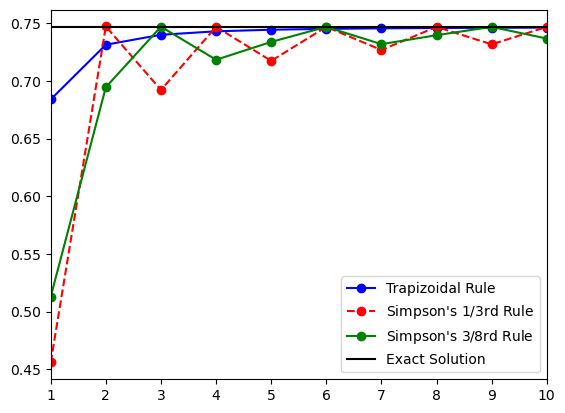

In [52]:
plt.plot(intervals,trap,"bo-",label = "Trapizoidal Rule")
plt.plot(intervals,sot,"ro--",label = "Simpson's $1/3$rd Rule")
plt.plot(intervals,ste,"go-",label = "Simpson's $3/8$rd Rule")
plt.plot(intervals, exact,"k-",label = "Exact Solution")
plt.xlim(1,10)
plt.legend()
plt.show()